Keiland Pullen

DSC 478 - Assignment 1


Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.) 
    Download the data set adult-modified.csv.... 
    
    Explore the general characterists of the data as a whole...

In [14]:
df = pd.read_csv("/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 2/Homework/adult-modified.csv")

df.shape

(9412, 8)

In [15]:
df.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


2.) 
    For the three numeric attributes (age, hours-per-week, education), display box plots that show....

    Next , create histograms for these three variables.
    
    Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

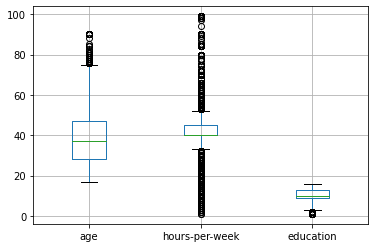

In [16]:
boxplot = df.boxplot(column=['age', 'hours-per-week','education'])

<AxesSubplot:ylabel='Frequency'>

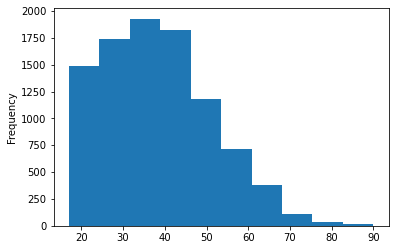

In [20]:
df["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

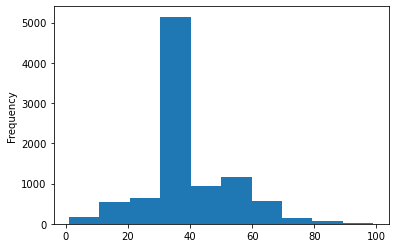

In [19]:
df["hours-per-week"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

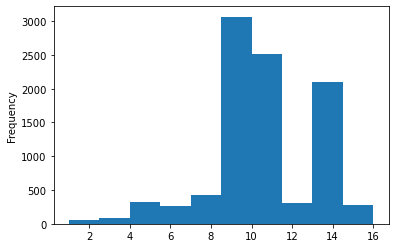

In [18]:
df["education"].plot(kind="hist")

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

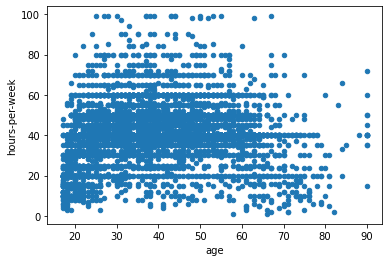

In [21]:
df.plot(x="age", y="hours-per-week", kind="scatter")

3.)
    For the remaining categorical attributes create bar charts that show the distribution of category frequencies...
    

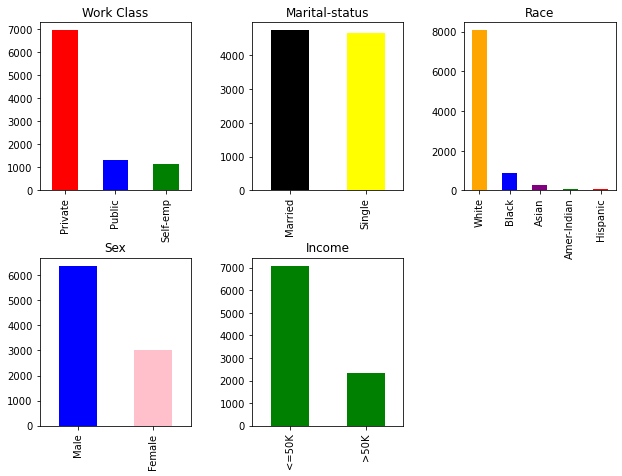

In [75]:


fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(231)
df["workclass"].value_counts().plot(kind='bar', title='Work Class', color=['red', 'blue', 'green'])

ax1 = fig.add_subplot(232)
df["marital-status"].value_counts().plot(kind='bar', title='Marital-status', color=['black', 'yellow'])

ax1 = fig.add_subplot(233)
df["race"].value_counts().plot(kind='bar', title='Race', color=['orange', 'blue', 'purple', 'green', 'red'])

ax1 = fig.add_subplot(234)
df["sex"].value_counts().plot(kind='bar', title='Sex', color=['blue', 'pink'])

ax1 = fig.add_subplot(235)
df["income"].value_counts().plot(kind='bar', title='Income', color=['green'])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

4.)
    Perform a cross-tabulation of each of he workclass and race attributes with the income attribute. 

In [85]:
wi = pd.crosstab(df["workclass"], df["income"])
wi

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


In [86]:
ri = pd.crosstab(df["race"], df["income"])
ri

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [83]:
df.groupby(["race","workclass"])["income"].count()
gg = df.groupby(["race","workclass"])["income"].count()
gg

race         workclass
Amer-Indian  Private        65
             Public         20
             Self-emp        7
Asian        Private       204
             Public         48
             Self-emp       39
Black        Private       664
             Public        192
             Self-emp       36
Hispanic     Private        64
             Public          5
             Self-emp        6
White        Private      5950
             Public       1052
             Self-emp     1060
Name: income, dtype: int64

<AxesSubplot:xlabel='workclass'>

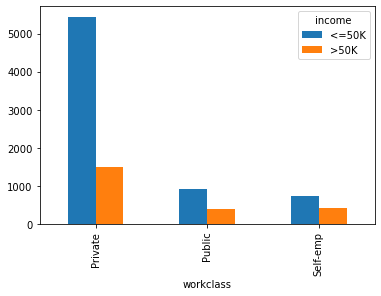

In [89]:
wi.plot(kind='bar')

<AxesSubplot:xlabel='race'>

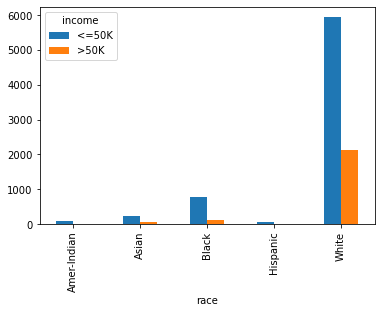

In [90]:
ri.plot(kind='bar')

In [101]:
pd.crosstab(df["race"], df["income"]<="50K") .apply(lambda r: r/r.sum(), axis=0) * 100

income,False
race,
Amer-Indian,0.977476
Asian,3.091798
Black,9.477263
Hispanic,0.796855
White,85.656609


If this calculations are correct, the above crosstab tells us that 85% of those that are labeled as "White" have incomes below $50K. Less than 1% or .79% of "Hispanics" have incomes less than $50K.  9.4% of "Blacks" have incomes less than $50K.  3.09% of Asians have income less than $50K.  Less than 1% or .97% of American-Indians have income less than $50K.

5.)
    Compare and contrast the characterisitics of the low-income and high-income categories across the different attributes...

In [110]:
low_income = df[(df.income<="<=50K")]
low_income

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9406,34,Self-emp,11,Married,White,Male,75,<=50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


In [112]:
low_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,7093.000000,7093,7093.000000,7093,7093,7093,7093.000000,7093
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,5443,NaN,4363,5944,4424,NaN,7093
mean,36.635979,NaN,9.646976,NaN,NaN,NaN,39.567038,NaN
std,13.339117,NaN,2.397358,NaN,NaN,NaN,11.868506,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,26.000000,NaN,9.000000,NaN,NaN,NaN,38.000000,NaN
50%,35.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN


In [109]:
high_income = df[(df.income>=">50K")]
high_income

,age,workclass,education,marital-status,race,sex,hours-per-week,income
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K
10,37,Private,10,Married,Black,Male,80,>50K
11,30,Public,13,Married,Asian,Male,40,>50K
...,...,...,...,...,...,...,...,...
9372,40,Private,9,Married,Black,Male,40,>50K
9375,47,Private,13,Married,White,Male,60,>50K
9379,38,Private,13,Married,White,Male,50,>50K
9385,43,Public,14,Single,Black,Female,40,>50K


In [113]:
high_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,2319.000000,2319,2319.000000,2319,2319,2319,2319.000000,2319
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Married,White,Male,NaN,>50K
freq,NaN,1504,NaN,2007,2118,1959,NaN,2319
mean,43.622251,NaN,11.588185,NaN,NaN,NaN,45.708495,NaN
std,10.047667,NaN,2.410764,NaN,NaN,NaN,10.678794,NaN
min,19.000000,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN
25%,36.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,43.000000,NaN,12.000000,NaN,NaN,NaN,40.000000,NaN
75%,50.000000,NaN,13.000000,NaN,NaN,NaN,50.000000,NaN


The data set was divided into two groups.  One group contained composed of all data where income was above "50K" and the second group where income was below or equal to "50K".  In both groups, the main race was "White" and the main sex was "Male".  The top workclass was "Private" in both groups. The average age in the high-income group was "43", whereas the average age in the low-income group was "36".  Regarding the marital-status, in the high-income group that top status was "married", while in the low-income group the typical marital-status was "single".  The average hours-per-week was fairly close with 45.7 hours in the high-income group and 39.5 in the low-income group.

6.)
    Convert the data into the standard spreadsheet format (data matrix).  This requires converting each categorical attribute into muliple dummy attributes... 

In [129]:
new_df = pd.get_dummies(df, columns=["workclass", "marital-status", "race", "sex", "income"])
new_df
new_df.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [130]:
new_df.describe()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217,0.738100,0.139928,0.121972,0.503294,0.496706,0.009775,0.030918,0.094773,0.007969,0.856566,0.321823,0.678177,0.753612,0.246388
std,12.962135,2.542118,11.884590,0.439692,0.346930,0.327271,0.500016,0.500016,0.098388,0.173105,0.292916,0.088915,0.350533,0.467200,0.467200,0.430930,0.430930
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,10.000000,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,47.000000,13.000000,45.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
new_df.to_csv("/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 2/Homework/adult_numeric.csv", float_format="%1.2f")

7.)
    Using the numeric data set with the dummy variables, perform basic correlation analysis among the attributes...

In [132]:
new_df_corr_matrix = new_df.corr()
new_df_corr_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


There are 3 correlations methods that we use.  The most popular is Pearson. The other 2 methods are Kendall Tau and Spearman.  Spearman is good for ordinal data.

In [134]:
new_df_corr_matrix["education"].sort_values(ascending=False)

education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

In [135]:
new_df_corr_matrix["income_<=50K"].sort_values(ascending=False)

income_<=50K              1.000000
marital-status_Single     0.414173
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
race_White               -0.092589
workclass_Self-emp       -0.105593
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64

The correlation on "income <=50K" shows that there is some slight positive correlation between "marital-status_Single" and some slight negative correlation between "marital-status_Married" and the "income <=50K" variable.  The remaining variables don't display much correlation.

8.) 
    Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old" ...

In [144]:
age_cat = pd.qcut(new_df["age"], q=3)

age_cat.head(10)

0      (31.0, 43.0]
1      (43.0, 90.0]
2      (31.0, 43.0]
3      (43.0, 90.0]
4    (16.999, 31.0]
5      (31.0, 43.0]
6      (43.0, 90.0]
7      (43.0, 90.0]
8    (16.999, 31.0]
9      (31.0, 43.0]
Name: age, dtype: category
Categories (3, interval[float64, right]): [(16.999, 31.0] < (31.0, 43.0] < (43.0, 90.0]]

In [150]:
age_cat = pd.cut(new_df["age"], [16.9, 31.0, 43.0, 90.0], labels=["young", "mid-age", "old"])
age_cat.head(10)

0    mid-age
1        old
2    mid-age
3        old
4      young
5    mid-age
6        old
7        old
8      young
9    mid-age
Name: age, dtype: category
Categories (3, object): ['young' < 'mid-age' < 'old']

In [157]:
new_df["age_cat"] = age_cat
new_df.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K,age_cat
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0,mid-age
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0,old
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0,mid-age
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0,old
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0,young
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0,mid-age
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0,old
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1,old
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1,young
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1,mid-age


9.)
    Use Min-Max Normalization to transform teh values of the attribute hours-per-week to the range 0.0 - 1.0. Next, perform z-score normalization to standardize the values of all numeric attributes (age, hours-per-week, education)....
    

In [160]:
min_hoursWeek = new_df["hours-per-week"].min()
max_hoursWeek = new_df["hours-per-week"].max()

#min_hoursWeek
#max_hoursWeek
print(min_hoursWeek, max_hoursWeek)

1 99


In [169]:
norm_hoursWeek = ( new_df["hours-per-week"] - min_hoursWeek ) / ( max_hoursWeek - min_hoursWeek)

norm_hoursWeek.head(10)

0    0.397959
1    0.122449
2    0.397959
3    0.397959
4    0.397959
5    0.397959
6    0.153061
7    0.448980
8    0.500000
9    0.397959
Name: hours-per-week, dtype: float64

In [165]:
temp_df = new_df[["age", "hours-per-week", "education"]]

temp_df.head(10)

,age,hours-per-week,education
0,39,40,13
1,50,13,13
2,38,40,9
3,53,40,7
4,28,40,13
5,37,40,14
6,49,16,5
7,52,45,9
8,31,50,14
9,42,40,13


In [167]:
zscore = lambda x: (x - x.mean()) / x.std()
zscore_temp_df = temp_df.apply(zscore)
zscore_temp_df.head(10)

,age,hours-per-week,education
0,0.049582,-0.090892,1.130842
1,0.898208,-2.362742,1.130842
2,-0.027566,-0.090892,-0.442649
3,1.129651,-0.090892,-1.229394
4,-0.799044,-0.090892,1.130842
5,-0.104713,-0.090892,1.524215
6,0.821060,-2.110314,-2.016140
7,1.052503,0.329821,-0.442649
8,-0.567600,0.750534,1.524215
9,0.281025,-0.090892,1.130842


In [176]:
hours_df = pd.DataFrame()

hours_df["reg-hours-per-week"] =  new_df["hours-per-week"]
hours_df["min-max-hours-per-week"] = norm_hoursWeek
hours_df["z-score-hours-per-week"] = zscore_temp_df["hours-per-week"]

hours_df.head(10)

,reg-hours-per-week,min-max-hours-per-week,z-score-hours-per-week
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
5,40,0.397959,-0.090892
6,16,0.153061,-2.110314
7,45,0.448980,0.329821
8,50,0.500000,0.750534
9,40,0.397959,-0.090892


10.)
    Now download a modified version of the data (adult-modified-missing-vals.csv) that contains missing values. 
    a.) using Pandas determine all the attributes with missing values...
    b.) Show all the instances in the data that contain a missing value.
    c.) Fill the missing values for all numeric attributes using teh mean value...
    d.) After filling in the missing numberic values, drop all rows where a categorical....
    e.) Show that the final resulting table does not contain missing values.

In [178]:
vals_df = pd.read_csv("/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 2/Homework/adult-modified-missing-vals.csv" , na_values=["?"])

vals_df.shape

(10000, 8)

In [186]:
vals_df.head(25)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


In [187]:
vals_df.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [207]:
vals_df.isnull()[0:25]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [189]:
vals_df[vals_df.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...
9944,NaN,Private,12,Single,White,Female,45,<=50K
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [190]:
vals_df[vals_df.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K
...,...,...,...,...,...,...,...,...
9907,68.0,NaN,9,Married,White,Male,15,<=50K
9926,73.0,NaN,7,Married,White,Male,8,<=50K
9927,18.0,NaN,7,Single,White,Female,20,<=50K
9938,36.0,NaN,10,Single,White,Female,25,<=50K


In [191]:
vals_df[vals_df.education.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [197]:
vals_df[vals_df["marital-status"].isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [193]:
vals_df[vals_df.race.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [194]:
vals_df[vals_df.sex.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [198]:
vals_df[vals_df["hours-per-week"].isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [196]:
vals_df[vals_df.income.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [200]:
age_mean = vals_df.age.mean()

vals_df.age.fillna(age_mean, axis=0, inplace=True)

#age_mean

In [201]:
vals_df[vals_df.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [203]:
vals_df.drop(vals_df[vals_df.workclass.isnull()].index, axis=0, inplace=True)


In [208]:
vals_df.isnull()[0:100]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
99,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False


In [205]:
vals_df[vals_df.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
